## 자율 주행을 위한 교통 표지판 인식 시스템

In [1]:
root_dir='GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/'

In [2]:
from skimage import io
import os
import glob

In [5]:
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))
all_img_paths[-5:]

['GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00025.ppm',
 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00026.ppm',
 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00027.ppm',
 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00028.ppm',
 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00029.ppm']

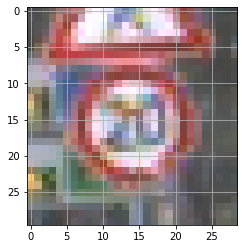

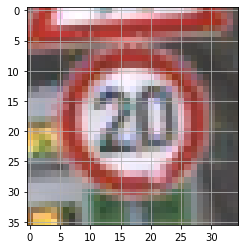

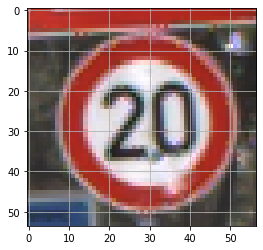

In [7]:
import matplotlib.pyplot as plt
for im_path in all_img_paths[0:30:10]:
    img = plt.imread(im_path)
    plt.imshow(img)
    plt.grid('off')
    plt.show()

In [8]:
import numpy as np
from skimage import color, exposure, transform

IMG_SIZE = 40

def preprocess_img(img):
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))
    return img

In [9]:
img_eg = np.array(preprocess_img(io.imread(all_img_paths[0])))
print(img_eg.shape)
max_1 = np.max(img_eg)
print(max_1)
max_2 = np.array(io.imread(all_img_paths[0]))
max_2 = np.max(max_2)
print(max_2)

(40, 40, 3)
1.0
255


transformed


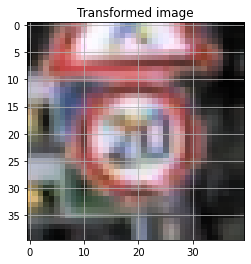

transformed


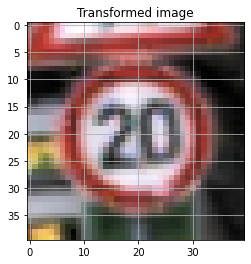

transformed


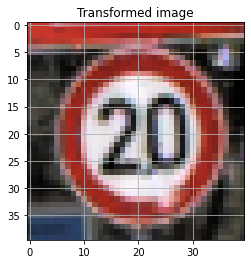

In [11]:
for img_path in all_img_paths[0:30:10]:
    img = plt.imread(img_path)
    img = preprocess_img(img)
    print('transformed')
    plt.imshow(img)
    plt.grid('off')
    plt.title('Transformed image')
    plt.show()

In [16]:
from tensorflow.keras.utils import to_categorical

imgs = []
labels = []
for img_path in all_img_paths:
    img = preprocess_img(io.imread(img_path))
    label = img_path.split('\\')[-2]
    imgs.append(img)
    labels.append(label)

In [17]:
X = np.array(imgs)
print(np.max(X))
classes = len(set(np.array(labels)))
print(classes)
y = to_categorical(labels, num_classes = classes)

1.0000000000000004
43


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(x_train.shape, y_train.shape)

(31367, 40, 40, 3) (31367, 43)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 40, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [23]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
981/981 [==============================] - 1668s 2s/step - loss: 2.5035 - acc: 0.3019 - val_loss: 0.1628 - val_acc: 0.9480
Epoch 2/10
981/981 [==============================] - 1650s 2s/step - loss: 0.2755 - acc: 0.9104 - val_loss: 0.1096 - val_acc: 0.9663
Epoch 3/10
981/981 [==============================] - 1576s 2s/step - loss: 0.1570 - acc: 0.9527 - val_loss: 0.0514 - val_acc: 0.9830
Epoch 4/10
981/981 [==============================] - 1583s 2s/step - loss: 0.1104 - acc: 0.9652 - val_loss: 0.0344 - val_acc: 0.9892
Epoch 5/10
981/981 [==============================] - 1630s 2s/step - loss: 0.0888 - acc: 0.9734 - val_loss: 0.0243 - val_acc: 0.9916
Epoch 6/10
981/981 [==============================] - 1649s 2s/step - loss: 0.0678 - acc: 0.9789 - val_loss: 0.0244 - val_acc: 0.9932
Epoch 7/10
981/981 [==============================] - 2104s 2s/step - loss: 0.0663 - acc: 0.9786 - val_loss: 0.0227 - val_acc: 0.9935
Epoch 8/10
981/981 [==============================] - 2971s 3s

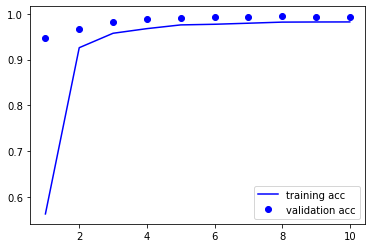

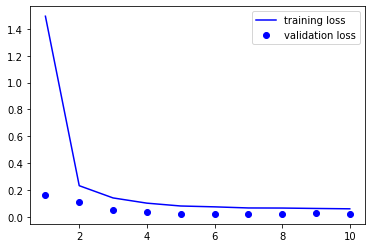

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'bo', label='validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'bo', label='validation loss')
plt.legend()
plt.show()